In [15]:
from scipy.io import loadmat
import numpy as np
from matplotlib import pyplot as plt
from glob import glob
from os import path
import os
path_to_dataset = "/home/nonari/Descargas/2015_BOE_Chiu/"
for dirname, _, filenames in os.walk(path_to_dataset):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/home/nonari/Descargas/2015_BOE_Chiu/Subject_01.mat
/home/nonari/Descargas/2015_BOE_Chiu/Subject_08.mat
/home/nonari/Descargas/2015_BOE_Chiu/Subject_07.mat
/home/nonari/Descargas/2015_BOE_Chiu/Subject_04.mat
/home/nonari/Descargas/2015_BOE_Chiu/Subject_03.mat
/home/nonari/Descargas/2015_BOE_Chiu/Subject_02.mat
/home/nonari/Descargas/2015_BOE_Chiu/Subject_09.mat
/home/nonari/Descargas/2015_BOE_Chiu/Subject_06.mat
/home/nonari/Descargas/2015_BOE_Chiu/Subject_05.mat
/home/nonari/Descargas/2015_BOE_Chiu/Subject_10.mat


In [14]:
fluid_class = 9


In [13]:
def get_valid_idx(manualLayer):
    idx = []
    for i in range(0,61):
        temp = manualLayer[:,:,i]
        if np.sum(temp) != 0:
            idx.append(i)
    return idx


In [27]:
def get_valid_img_seg(mat):
    manualLayer = np.array(mat['manualLayers1'], dtype=np.uint16)
    manualFluid = np.array(mat['manualFluid1'], dtype=np.uint16)
    img = np.array(mat['images'], dtype=np.uint8)
    valid_idx = get_valid_idx(manualLayer)


    manualFluid = manualFluid[:, :, valid_idx]
    manualLayer = manualLayer[:, :, valid_idx]

    print(manualLayer.shape)

    seg = np.zeros((496, 768, 11))
    seg[manualFluid > 0] = fluid_class
    max_col = -100
    min_col = 900
    for b_scan_idx in range(0, 11):
        for col in range(768):
            cur_col = manualLayer[:, col, b_scan_idx]
            if np.sum(cur_col) == 0:
                continue

            max_col = max(max_col, col)
            min_col = min(min_col, col)

            labels_idx = cur_col.tolist()
    #         print(f'{b_scan_idx} {labels_idx}')
    #         labels_idx.append(-1)
    #         labels_idx.insert(0, 0)
            last_st = None
            #Correccion: Salta error si el ed del label 0 es 0 (al principio de la iteracion)

            last_ed = 0
            for label, (st, ed) in enumerate(zip([0]+labels_idx, labels_idx+[-1])):
    #             print(st, ed)
                if st == 0 and ed == 0:
                    st = last_ed
                    print(seg[st, col, b_scan_idx])
                    try:
                        seg[st, col, b_scan_idx][0]
                        print("aqui")
                    except:
                        print("quie")
                    while(seg[st, col, b_scan_idx] == fluid_class):
                        st += 1

                    while(seg[st, col, b_scan_idx] != fluid_class):
                        seg[st, col, b_scan_idx] = label
                        st += 1
                        if st >= 496:
                            break
                    continue
                if ed == 0:
                    ed = st + 1
                    while(seg[ed, col, b_scan_idx] != fluid_class):
                        ed += 1

                if st == 0 and label != 0:
                    st = ed-1
                    while(seg[st, col, b_scan_idx] != fluid_class):
                        st -= 1
                    st += 1

                seg[st:ed, col, b_scan_idx] = label
                last_st = st
                last_ed = ed

    seg[manualFluid > 0] = fluid_class

    seg = seg[:, min_col:max_col+1]
    img = img[:, min_col:max_col+1]
    return img, seg, valid_idx

In [16]:
mat_fps = glob(path.join(path_to_dataset, '*.mat'))

In [17]:
mat = loadmat(mat_fps[0])

In [28]:
all_img = []
all_lab = []
d = 0
for idx, m in enumerate(mat_fps):
    if idx < 3:
        continue
    mat = loadmat(m)
    print("WILL LOAD ANOTHER")
    img, seg, indices = get_valid_img_seg(mat)
    for i in range(11):
        print(indices[i])
        # plt.imsave(f'/home/nonari/Documentos/tfgdata/img_{d}.png', img[:,:,indices[i]])
        # plt.imsave(f'/home/nonari/Documentos/tfgdata/seg_{d}.png', seg[:,:,i])
        d += 1


WILL LOAD ANOTHER
(8, 768, 11)
9.0
quie
9.0
quie
9.0
quie
9.0
quie
9.0
quie
9.0
quie
9.0
quie
9.0
quie
9.0
quie
9.0
quie
9.0
quie
9.0
quie
9.0
quie
9.0
quie
9.0
quie
9.0
quie
9.0
quie
9.0
quie
9.0
quie
9.0
quie
9.0
quie
9.0
quie
9.0
quie
9.0
quie
9.0
quie
9.0
quie
9.0
quie
9.0
quie
9.0
quie
9.0
quie
9.0
quie
9.0
quie
9.0
quie
9.0
quie
9.0
quie
9.0
quie
9.0
quie
9.0
quie
9.0
quie
9.0
quie
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
aqui


KeyboardInterrupt: 

In [55]:
img, seg, indices = get_valid_img_seg(mat)


(8, 768, 11)


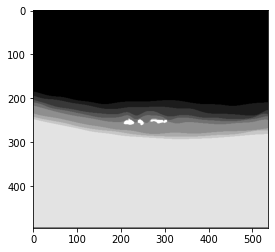

In [25]:
plt.imshow(seg[:, :, 0], cmap=plt.cm.gray, vmax=9)

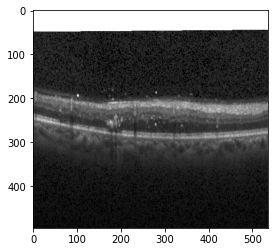

In [26]:
plt.imshow(img[:, :, 10], cmap=plt.cm.gray)

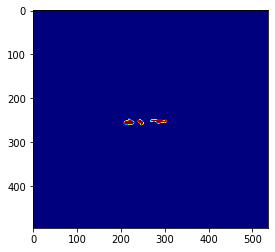

In [53]:
a = seg!=9
seg[a]=0
plt.imshow(seg[:, :, 0], cmap=plt.cm.jet, vmax=9)